Don't run all cells on this notebook; different analyses are separated by headers. If you run all it'll scrape Zillow and I don't have permission for >1000 requests yet.

# Analyzing Zillow Neighborhood Data

In [26]:
#import libraries
import pandas
from matplotlib import pyplot

In [9]:
#get data
allData = pandas.read_csv('Neighborhood_Zri_AllHomesPlusMultifamily_Summary.csv')
data = allData[allData['Metro'] == 'Boston']

In [10]:
#print data
data

,Date,RegionName,State,Metro,County,City,SizeRank,Zri,MoM,QoQ,YoY,ZriRecordCnt
104,2017-10-31,South Dorchester,MA,Boston,Suffolk,Boston,104,2395,0.002092,-0.007871,0.039497,13142
154,2017-10-31,Roxbury,MA,Boston,Suffolk,Boston,154,2494,0.001204,-0.006375,0.031858,6965
221,2017-10-31,East Boston,MA,Boston,Suffolk,Boston,221,2396,0.005455,0.006723,0.027444,7677
237,2017-10-31,Jamaica Plain,MA,Boston,Suffolk,Boston,237,2644,0.000000,-0.001888,0.025204,12074
248,2017-10-31,Brighton,MA,Boston,Suffolk,Boston,248,2449,0.001226,0.003277,0.034206,18350
279,2017-10-31,Mattapan,MA,Boston,Suffolk,Boston,279,2333,0.005603,-0.004268,0.025945,5959
286,2017-10-31,South Boston,MA,Boston,Suffolk,Boston,286,2823,0.005700,0.007495,0.027667,14948
308,2017-10-31,Hyde Park,MA,Boston,Suffolk,Boston,308,2437,0.009110,0.017537,0.033065,8375
321,2017-10-31,Roslindale,MA,Boston,Suffolk,Boston,321,2431,0.003716,0.003302,0.030521,8673
355,2017-10-31,West Roxbury,MA,Boston,Suffolk,Boston,355,2535,0.007552,0.012380,0.038509,10488


Zri = Zillow Rental Index https://www.zillow.com/research/zillow-rent-index-methodology-2393/<br>
MoM = month over month <br>
YoY = year over year <br>
QoQ = quarter over quarter

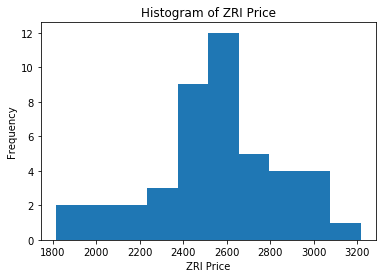

In [27]:
#create histogram of prices
pyplot.hist(data['Zri'],
            bins='auto')
pyplot.title('Histogram of ZRI Price')
pyplot.xlabel('ZRI Price')
pyplot.ylabel('Frequency')
pyplot.show()

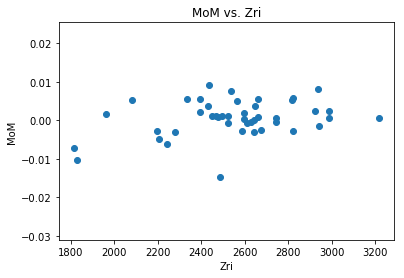

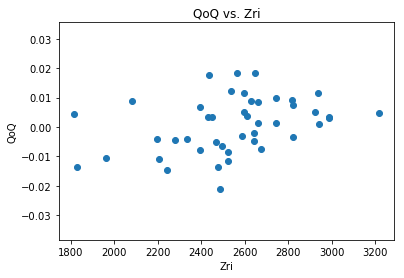

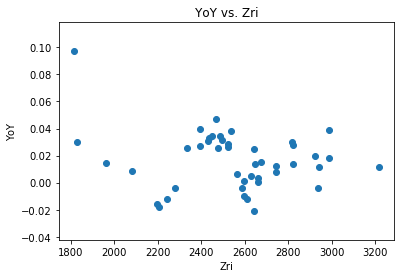

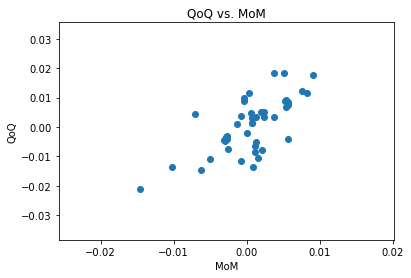

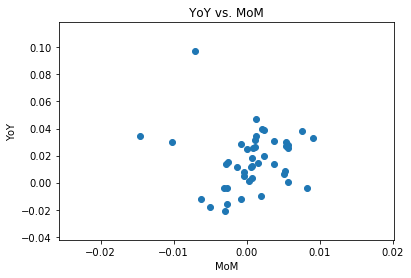

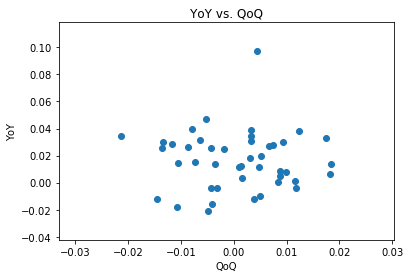

In [31]:
#make more plots
def varPlot(indVar, depVar):
    pyplot.scatter(data[indVar], data[depVar])
    pyplot.title(depVar + ' vs. ' + indVar)
    pyplot.xlabel(indVar)
    pyplot.ylabel(depVar)
    pyplot.show()
    
varPlot('Zri', 'MoM')
varPlot('Zri', 'QoQ')
varPlot('Zri', 'YoY')
varPlot('MoM', 'QoQ')
varPlot('MoM', 'YoY')
varPlot('QoQ', 'YoY')

None of the above relationships look very interesting to me. Anyone else have thoughts?

# ZRI Time Series

In [1]:
#import libraries
import pandas
import numpy
from matplotlib import pyplot
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
#get data
allData = pandas.read_csv('Neighborhood_Zri_AllHomesPlusMultifamily.csv')
data = allData[allData['Metro'] == 'Boston']

In [3]:
#print data
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
104,275424,South Dorchester,Boston,MA,Boston,Suffolk,105,1462.0,1478.0,1495.0,...,2352,2377,2408,2428,2436,2428,2414,2398,2390,2395
154,54232,Roxbury,Boston,MA,Boston,Suffolk,155,1448.0,1463.0,1508.0,...,2449,2473,2503,2521,2532,2521,2510,2496,2491,2494
221,154399,East Boston,Boston,MA,Boston,Suffolk,222,1994.0,1947.0,1860.0,...,2354,2364,2379,2395,2398,2390,2380,2375,2383,2396
237,154795,Jamaica Plain,Boston,MA,Boston,Suffolk,238,1547.0,1591.0,1641.0,...,2620,2631,2637,2645,2651,2651,2649,2643,2644,2644
248,37575,Brighton,Boston,MA,Boston,Suffolk,249,2128.0,2098.0,2058.0,...,2366,2390,2422,2448,2457,2448,2441,2441,2446,2449
279,154970,Mattapan,Boston,MA,Boston,Suffolk,280,1472.0,1496.0,1512.0,...,2320,2329,2342,2355,2365,2357,2343,2326,2320,2333
286,155633,South Boston,Boston,MA,Boston,Suffolk,287,1679.0,1703.0,1760.0,...,2803,2817,2821,2819,2814,2810,2802,2800,2807,2823
308,154775,Hyde Park,Boston,MA,Boston,Suffolk,309,1521.0,1539.0,1576.0,...,2384,2382,2378,2392,2402,2401,2395,2393,2415,2437
321,155506,Roslindale,Boston,MA,Boston,Suffolk,322,1520.0,1536.0,1576.0,...,2421,2441,2451,2452,2445,2433,2423,2414,2422,2431
355,155995,West Roxbury,Boston,MA,Boston,Suffolk,356,1542.0,1565.0,1620.0,...,2512,2532,2540,2540,2532,2514,2504,2499,2516,2535


In [4]:
#get time series
timeSeries = data.drop(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
timeSeries.index = numpy.arange(0, len(timeSeries.index))

C:\Users\StuBab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


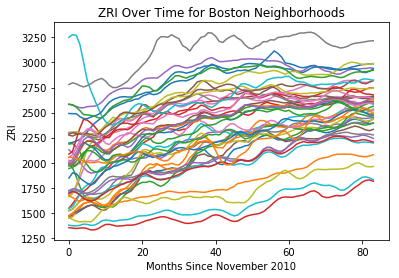

In [5]:
#plot time series
months = numpy.arange(0, len(timeSeries.columns))
for i in range(0, len(timeSeries.index)):
    pyplot.plot(months,
                timeSeries.ix[i])
pyplot.title('ZRI Over Time for Boston Neighborhoods')
pyplot.xlabel('Months Since November 2010')
pyplot.ylabel('ZRI')
pyplot.show()

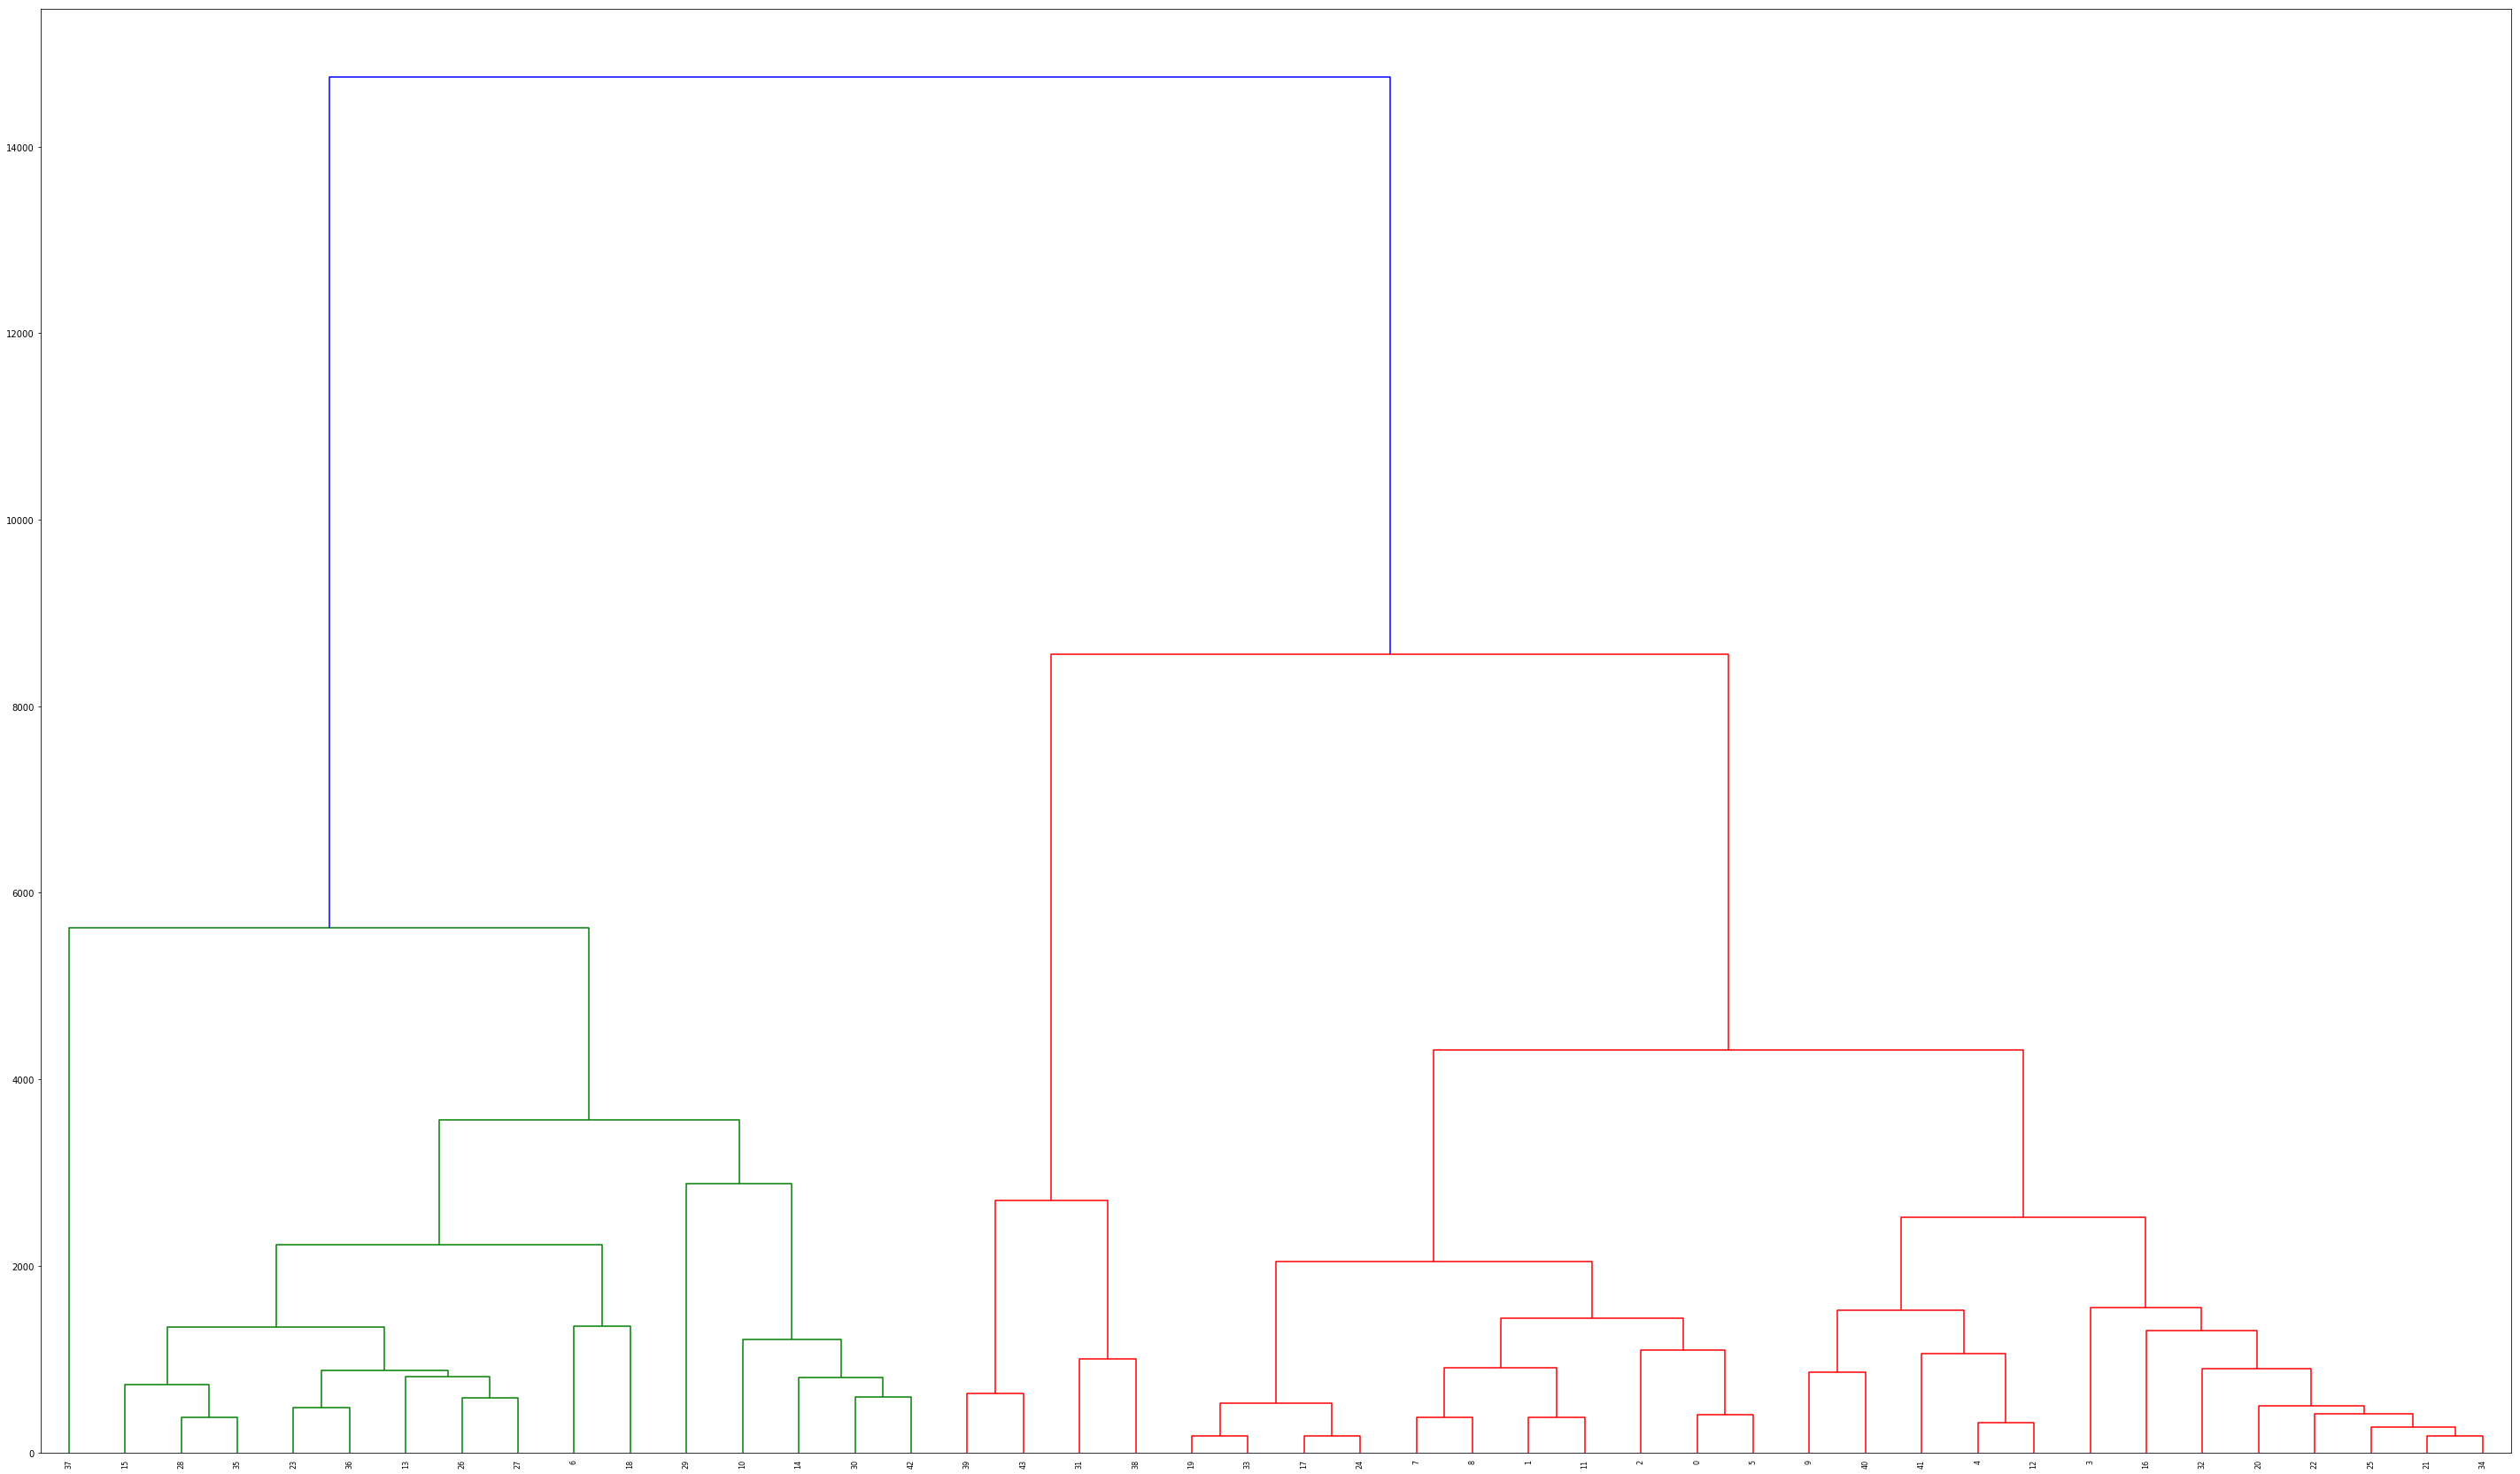

In [6]:
#hierarchical clustering
Z = hierarchy.linkage(numpy.array(timeSeries.as_matrix()), method='complete')
pyplot.figure(figsize=(50,30))
R = hierarchy.dendrogram(Z, p=10, truncate_mode='level')
pyplot.show()

In [7]:
#calculing k-means clusters
ss = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    max_iter=100,
                    n_init=10)
    kmeans.fit_predict(timeSeries)
    labels = kmeans.labels_
    ss.append(metrics.silhouette_score(timeSeries, kmeans.labels_, metric='euclidean'))

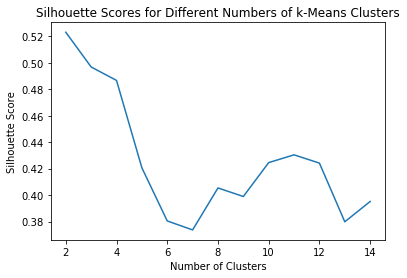

In [8]:
#plot silhouette score
pyplot.plot(range(2, 15), ss)
pyplot.title('Silhouette Scores for Different Numbers of k-Means Clusters')
pyplot.xlabel('Number of Clusters')
pyplot.ylabel('Silhouette Score')
pyplot.show()

In [9]:
#re-run for best k-means cluster value
k = 2
kmeans = KMeans(n_clusters=k,
                init='k-means++',
                max_iter=100,
                n_init=10)
kmeans.fit_predict(timeSeries)
labels = kmeans.labels_

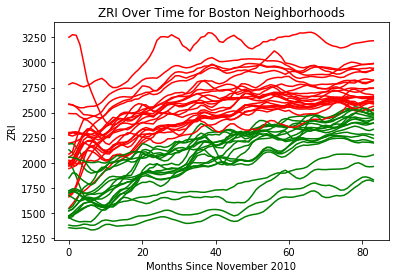

In [10]:
#plot time series with clusters
colors = ['red', 'green', 'blue', 'orange']
for i in range(0, len(timeSeries.index)):
    pyplot.plot(months,
                timeSeries.ix[i],
                color=colors[labels[i]])
pyplot.title('ZRI Over Time for Boston Neighborhoods')
pyplot.xlabel('Months Since November 2010')
pyplot.ylabel('ZRI')
pyplot.show()

In [22]:
#dynamic time warping
def dtw(x, y):
    months = timeSeries.columns
    dist_matrix = numpy.zeros((len(x), len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            dist_matrix[i, j] = numpy.sqrt((x[months[i]]-y[months[j]])**2)
    accum_dist_matrix = numpy.zeros((len(x), len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            if i > 0 and j > 0:
                accum_dist_matrix[i, j] = dist_matrix[i, j] + min(accum_dist_matrix[i, j-1], accum_dist_matrix[i-1, j], accum_dist_matrix[i-1, j-1])
            elif i == 0 and j == 0:
                accum_dist_matrix[i, j] = dist_matrix[i, j]
            elif i == 0:
                accum_dist_matrix[i, j] = dist_matrix[i, j] + accum_dist_matrix[i, j-1]
            elif j == 0:
                accum_dist_matrix[i, j] = dist_matrix[i, j] + accum_dist_matrix[i-1, j]
    return accum_dist_matrix[len(x)-1, len(x)-1]

In [25]:
#define similariy matrix
similarity = numpy.zeros((len(timeSeries.index), len(timeSeries.index)))
for i in range(0, len(timeSeries.index)):
    i_user = timeSeries.ix[i]
    for j in range(0, len(timeSeries.index)):
        j_user = timeSeries.ix[j]
        similarity[i, j] = dtw(i_user, j_user)

In [26]:
similarity

array([[      0.,    2661.,    3288., ...,   11272.,   64259.,   25465.],
       [   2661.,       0.,    4324., ...,   10581.,   51987.,   31490.],
       [   3288.,    4324.,       0., ...,   12012.,   61740.,   33298.],
       ..., 
       [  11272.,   10581.,   12012., ...,       0.,   44776.,   57434.],
       [  64259.,   51987.,   61740., ...,   44776.,       0.,  108594.],
       [  25465.,   31490.,   33298., ...,   57434.,  108594.,       0.]])

# Scraping Zillow Property by Property

In [1]:
#import libraries
import pandas
import requests
from bs4 import BeautifulSoup
import lxml

In [2]:
#get addresses
allProperties = pandas.read_csv('property-assessment-fy2017.csv')

C:\Users\StuBab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#set URLs
baseURL = 'http://www.zillow.com/webservice/GetDeepSearchResults.htm?zws-id=X1-ZWz18viv1r9s0b_5cfwc'
addressURLStart = '&address='
cityStateURLStart = '&citystatezip='

In [18]:
#parse xml
def parseXML(response):
    xml = response.text.encode('utf-8')
    soup = BeautifulSoup(xml, 'lxml')
    return soup

In [20]:
#loop through
for i in range(0, len(allProperties['MAIL_ADDRESS'])):
    address = allProperties['MAIL_ADDRESS'][i]
    cityState = allProperties['MAIL CS'][i]
    addressURL = addressURLStart + address.replace(' ', '+')
    cityStateURL = cityStateURLStart + cityState.replace(' ', '+')
    response = requests.get(baseURL + addressURL + cityStateURL)
    test = parseXML(response)
    print(test)
    try:
        print(addressURL, test.findAll('latitude')[0].text)
    except:
        print('Not found.', addressURL)

<?xml version="1.0" encoding="utf-8"?><html><body><searchresults:searchresults xmlns:searchresults="http://www.zillow.com/static/xsd/SearchResults.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemalocation="http://www.zillow.com/static/xsd/SearchResults.xsd https://www.zillowstatic.com/vstatic/6ce354c/static/xsd/SearchResults.xsd"><request><address></address><citystatezip></citystatezip></request><message><text>Error: this account has reached is maximum number of calls for today</text><code>7</code></message></searchresults:searchresults><!-- H:012  T:82ms  S:150  R:Wed Nov 29 12:53:30 PST 2017  B:5.0.50267.8-hotfix_2017-11-28.3ecc3df~hotfix-platform-for-2017-11-28.4b0f42f --></body></html>
Not found. &address=195+LEXINGTON+ST
